# Explore here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob
import shutil
#------------ PREPROCESING --------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.image import ImageDataGenerator
# ----------- MACHINE LEARNING ----------
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.layers import Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# ----------- METRICS -------------------
from sklearn.metrics import accuracy_score
#------------ OPTIMIZATION --------------
from sklearn.model_selection import GridSearchCV

2023-10-27 04:40:26.440800: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-27 04:40:29.680300: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-27 04:40:29.691044: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 04:40:32.835097: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
'''
#Create dog and cat folders
source_folder = "../data/raw/train/"
cats_destination_folder = "../data/raw/cat"
dogs_destination_folder = "../data/raw/dog"

#Check if folder exists
os.makedirs(cats_destination_folder, exist_ok=True)
os.makedirs(dogs_destination_folder, exist_ok=True)

#Move Dog Folders
search_word = "dog"
for filename in os.listdir(source_folder):
    if search_word in filename:
        
        source_file = os.path.join(source_folder, filename)
        destination_file = os.path.join(dogs_destination_folder, filename)
        
        shutil.move(source_file, destination_file)

#Move Dog Folders
search_word = "cat"
for filename in os.listdir(source_folder):
    if search_word in filename:
        
        source_file = os.path.join(source_folder, filename)
        destination_file = os.path.join(cats_destination_folder, filename)
        
        shutil.move(source_file, destination_file)

os.rmdir(source_folder)
'''

In [ ]:
#Traing Dogs and Cat Images File Names
dogs_folder_path = "../data/raw/dog/"
dog_images = os.listdir(dogs_folder_path)

cats_folder_path = "../data/raw/cat/"
cats_images = os.listdir(cats_folder_path)


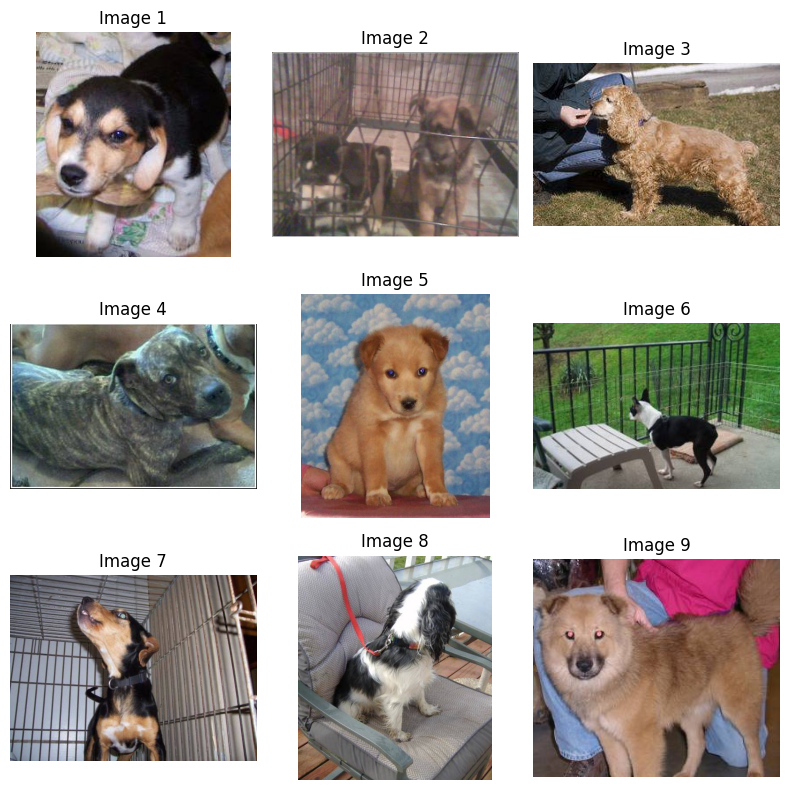

In [ ]:
#Display Dog Images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    dog_image = cv2.imread(dogs_folder_path + dog_images[i])
    ax.imshow(cv2.cvtColor(dog_image, cv2.COLOR_BGR2RGB), cmap='gray')
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

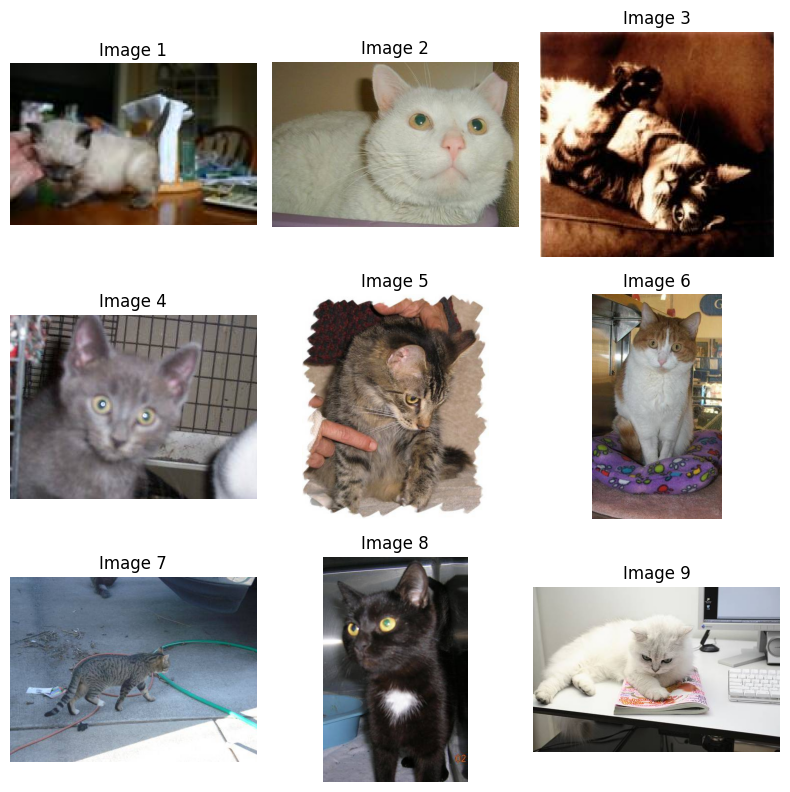

In [ ]:
#Display Cat Images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    cat_image = cv2.imread(cats_folder_path + cats_images[i])
    ax.imshow(cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB), cmap='gray')
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#Create Datasets
raw_folder_path = "../data/raw/"
# Define image size
image_size = (200, 200)

#Create Data generator
datagen = ImageDataGenerator()

trdata = datagen.flow_from_directory(
    raw_folder_path,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

Found 25000 images belonging to 2 classes.


In [ ]:
tsdata = datagen.flow_from_directory(
    raw_folder_path,
    target_size = image_size,
    classes = ["test"] 
)

Found 12500 images belonging to 1 classes.


In [ ]:
tsdata[0][1].shape

(32, 1)

In [ ]:
#Create the Model 
set_random_seed(2125)

#Model is updated to fit the requirements input shape = (200, 200, 3)
# Convolution layers are used to allow the Neural Network to identify the cat and dogs on different postion of the Image 
model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
#Then, data is processed by common dense layers.
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax")) #Activation softmax is used to generate an output between 0 and 1.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 128)       0         
 g2D)                                                   

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model

In [ ]:
model.fit(trdata, epochs = 1)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Optimize the Model
checkpoint_callback = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early_stopping_callback = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
history = model.fit_generator(trdata, steps_per_epoch = 100, validation_data = tsdata, validation_steps = 10, epochs = 3, callbacks = [checkpoint_callback, early_stopping_callback])